In [15]:
#Imports:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [16]:
#Lets read the DDBB:
dataBase = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
dataBase.info()
print(dataBase.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
Name       

Tenim 16719 files, i 16 columnes. Com veiem, moltes de les columnes tenen variables nul·les per exemple la més significativa és la de **User_Count** que conté més del 50% de dades nul·les.
Per treure aquestes dades contaminades farem el següent:

In [17]:
dataBase = dataBase.dropna()
dataBase.info()
print(dataBase.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB
Name      

Veiem que l'extensió del dataset és molt més petit d'aquesta forma, encara que hauriem de fer més transformacions primer mirarem com està la correl·lació ara mateix.

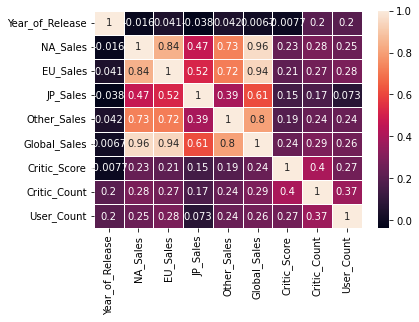

In [18]:
corr = dataBase.corr()
plt.figure()
hm = sns.heatmap(corr, annot=True, linewidths=.5)

La pregunta ara és: Per què atributs com Name o User_Score no surten? Perquè com podem veure més adalt, **no són de tipus object**, per tal de convertir-los farem lo següent:

In [20]:


nameCopy = dataBase.copy()
transform = list()

for column in nameCopy.columns:
    if column != "Name":
        transform.append(column)

nameCopy.drop(transform, axis="columns", inplace=True)

platformCopy = dataBase.copy()
transform = list()

for column in platformCopy.columns:
    if column != "Platform":
        transform.append(column)

platformCopy.drop(transform, axis="columns", inplace=True)

genreCopy = dataBase.copy()
transform = list()

for column in genreCopy.columns:
    if column != "Genre":
        transform.append(column)

genreCopy.drop(transform, axis="columns", inplace=True)

publishCopy = dataBase.copy()
transform = list()

for column in publishCopy.columns:
    if column != "Publisher":
        transform.append(column)

publishCopy.drop(transform, axis="columns", inplace=True)

userScoreCopy = dataBase.copy()
transform = list()

for column in userScoreCopy.columns:
    if column != "User_Score":
        transform.append(column)

userScoreCopy.drop(transform, axis="columns", inplace=True)

developerCopy = dataBase.copy()
transform = list()

for column in developerCopy.columns:
    if column != "User_Score":
        transform.append(column)

developerCopy.drop(transform, axis="columns", inplace=True)

ratingCopy = dataBase.copy()
transform = list()

for column in ratingCopy.columns:
    if column != "User_Score":
        transform.append(column)

ratingCopy.drop(transform, axis="columns", inplace=True)

encoder = OrdinalEncoder()
encoder.fit(nameCopy)
encoder.categories_
Name = encoder.transform(nameCopy)

encoder = OrdinalEncoder()
encoder.fit(platformCopy)
encoder.categories_
Platform = encoder.transform(platformCopy)

encoder = OrdinalEncoder()
encoder.fit(genreCopy)
encoder.categories_
Genre = encoder.transform(genreCopy)

encoder = OrdinalEncoder()
encoder.fit(publishCopy)
encoder.categories_
Publisher = encoder.transform(publishCopy)

encoder = OrdinalEncoder()
encoder.fit(userScoreCopy)
encoder.categories_
User_Score = encoder.transform(userScoreCopy)

encoder = OrdinalEncoder()
encoder.fit(developerCopy)
encoder.categories_
Developer = encoder.transform(developerCopy)


encoder = OrdinalEncoder()
encoder.fit(ratingCopy)
encoder.categories_
Rating = encoder.transform(ratingCopy)


dataBase["Name"] = Name
dataBase["Platform"] = Platform
dataBase["Genre"] = Genre
dataBase["Publisher"] = Publisher
dataBase["User_Score"] = User_Score
dataBase["Developer"] = Developer
dataBase["Rating"] = Rating

dataBase.info()

dataBase



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   float64
 1   Platform         6825 non-null   float64
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   float64
 4   Publisher        6825 non-null   float64
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   float64
 15  Rating           6825 non-null   float64
dtypes: float64(16)
memory usage: 906.4 KB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,4215.0,12.0,2006.0,10.0,160.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,72.0,322.0,72.0,72.0
2,2087.0,12.0,2008.0,6.0,160.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,75.0,709.0,75.0,75.0
3,4217.0,12.0,2009.0,10.0,160.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,72.0,192.0,72.0,72.0
6,2567.0,2.0,2006.0,4.0,160.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,77.0,431.0,77.0,77.0
7,4213.0,12.0,2006.0,3.0,160.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,58.0,129.0,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,1048.0,3.0,2001.0,0.0,158.0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,16.0,21.0,16.0,16.0
16677,2297.0,3.0,2002.0,2.0,146.0,0.01,0.00,0.00,0.00,0.01,81.0,12.0,80.0,9.0,80.0,80.0
16696,2194.0,5.0,2014.0,0.0,123.0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,68.0,412.0,68.0,68.0
16700,407.0,5.0,2011.0,8.0,53.0,0.01,0.00,0.00,0.00,0.01,61.0,12.0,50.0,43.0,50.0,50.0


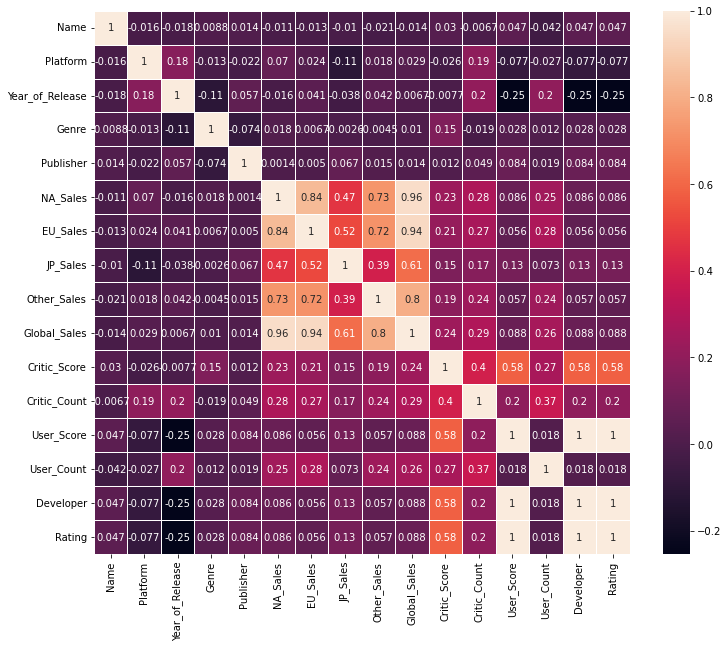

In [23]:
corr = dataBase.corr()
plt.figure(figsize=(12,10))
hm = sns.heatmap(corr, annot=True, linewidths=.5)